# Minerales fantásticos y dónde encontrarlos
Los sistemas de la nave detectan un posible candidato para planeta habitable, e inician el protocolo Phoenix para finalizar el estado de criogenización de los pasajeros.

Necesitamos analizar el planeta para determinar sus características, su habitabilidad, su clima, su abundancia de materias primas para generar combustibles, etc.
Para ello, se envía una sonda que se acerca al planeta y escanea con precisión su corteza y los minerales que se encuentran en ella, en observaciones cartográficas de 100 x 100 metros. Nuestro objetivo ahora será crear un modelo en base a los datos obtenidos por la sonda para poder determinar la composición de minerales de todo el planeta.

Descarga los datos de la sonda, analízalos, límpialos, realiza procesos de ingeniería de variables y crea un modelo para predecir el tipo de mineral, buscando maximizar el accuracy. Por último, categoriza el conjunto de test que viene incluido en la descarga de los datos y envía las predicciones de los registros en el orden original separadas por comas, de la siguiente manera:

5,2,4,3,1

El ejemplo expuesto se correspondería con las predicciones de los 5 primeros registros, tendréis que subir en una sola línea las 2,000 predicciones usando este formato.

5,2,4,3,1,5,6,3,2,5,7,3,2,4,5

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [7]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

In [8]:
train

,climaticZone,planetSection,temperatureSecondHalfPlanetRotation,temperatureFirstHalfPlanetRotation,mineralDensity,geoZone,longitude,rockSize,waterStreamDistanceY,cover,magmaConcentrationDistance,waterStreamDistanceX,detectionDepth,mineralType,id
0,4,Tatoooine,28.9,-999.0,4617.64,7,71.86,3,16.76,4,VERY_CLOSE,857.70,27.49,5,0
1,7,Tatoooine,36.8,103.0,9859.22,1,360.78,0,12.13,0,VERY_CLOSE,103.28,27.30,1,1
2,8,Mordor,33.0,111.9,-999.00,7,37.66,1,1.90,3,CLOSE,102.74,32.25,7,2
3,2,Hyrule,25.5,108.4,-999.00,7,134.36,3,11.89,4,CLOSE,135.40,22.35,4,3
4,2,Hyrule,29.5,111.6,3991.21,7,109.15,1,0.00,1,VERY_CLOSE,0.00,23.19,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12616,8,Mordor,21.4,96.6,10576.29,7,105.95,1,9.94,3,CLOSE,137.87,33.30,1,12616
12617,4,Tatoooine,37.9,110.8,6457.13,7,330.01,3,40.10,4,CLOSE,894.74,28.76,5,12617
12618,7,Mordor,33.4,110.5,-999.00,7,29.92,1,20.10,3,MEDIUM,1164.81,31.89,1,12618
12619,7,Tatoooine,36.8,106.2,10078.16,7,358.35,1,211.54,3,MEDIUM,3563.83,32.61,1,12619


In [9]:
test

,climaticZone,planetSection,temperatureSecondHalfPlanetRotation,temperatureFirstHalfPlanetRotation,mineralDensity,geoZone,longitude,rockSize,waterStreamDistanceY,cover,magmaConcentrationDistance,waterStreamDistanceX,detectionDepth,id
0,7,Mordor,38.5,101.4,11991.84,7,341.76,1,162.56,3,VERY_CLOSE,1306.21,27.93,0
1,4,Hyrule,32.8,100.3,10393.00,7,18.63,3,58.05,4,VERY_CLOSE,563.96,23.00,1
2,8,Mordor,28.9,104.3,5384.38,7,53.95,1,3.96,3,CLOSE,515.45,32.46,2
3,4,Hyrule,32.9,108.1,6383.95,7,36.91,3,95.56,4,VERY_CLOSE,689.62,24.07,3
4,8,Mordor,30.2,102.0,4785.65,7,40.08,1,4.00,3,MEDIUM,102.68,34.01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,Hyrule,35.5,98.4,12434.24,7,15.94,3,18.29,4,VERY_CLOSE,99.75,22.37,1995
1996,2,Tatoooine,35.4,107.5,-999.00,7,270.80,3,125.56,4,CLOSE,1437.68,28.99,1996
1997,4,Hyrule,36.6,93.3,-999.00,7,7.96,3,23.16,4,VERY_CLOSE,94.98,20.47,1997
1998,4,Hyrule,17.1,84.3,17306.30,7,80.22,3,107.12,4,VERY_CLOSE,504.36,20.86,1998


Pasos a realizar --> Exploratory Data Analysis - Data Visualization - Data Preprocessing - Feature Engineering - Modeling - Evaluation - Tuning - Deployment

# Exploratory Data Analysis (EDA) y Data Visualization

array([[<AxesSubplot:title={'center':'climaticZone'}>,
        <AxesSubplot:title={'center':'temperatureSecondHalfPlanetRotation'}>,
        <AxesSubplot:title={'center':'temperatureFirstHalfPlanetRotation'}>,
        <AxesSubplot:title={'center':'mineralDensity'}>],
       [<AxesSubplot:title={'center':'geoZone'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'rockSize'}>,
        <AxesSubplot:title={'center':'waterStreamDistanceY'}>],
       [<AxesSubplot:title={'center':'cover'}>,
        <AxesSubplot:title={'center':'waterStreamDistanceX'}>,
        <AxesSubplot:title={'center':'detectionDepth'}>,
        <AxesSubplot:title={'center':'mineralType'}>],
       [<AxesSubplot:title={'center':'id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

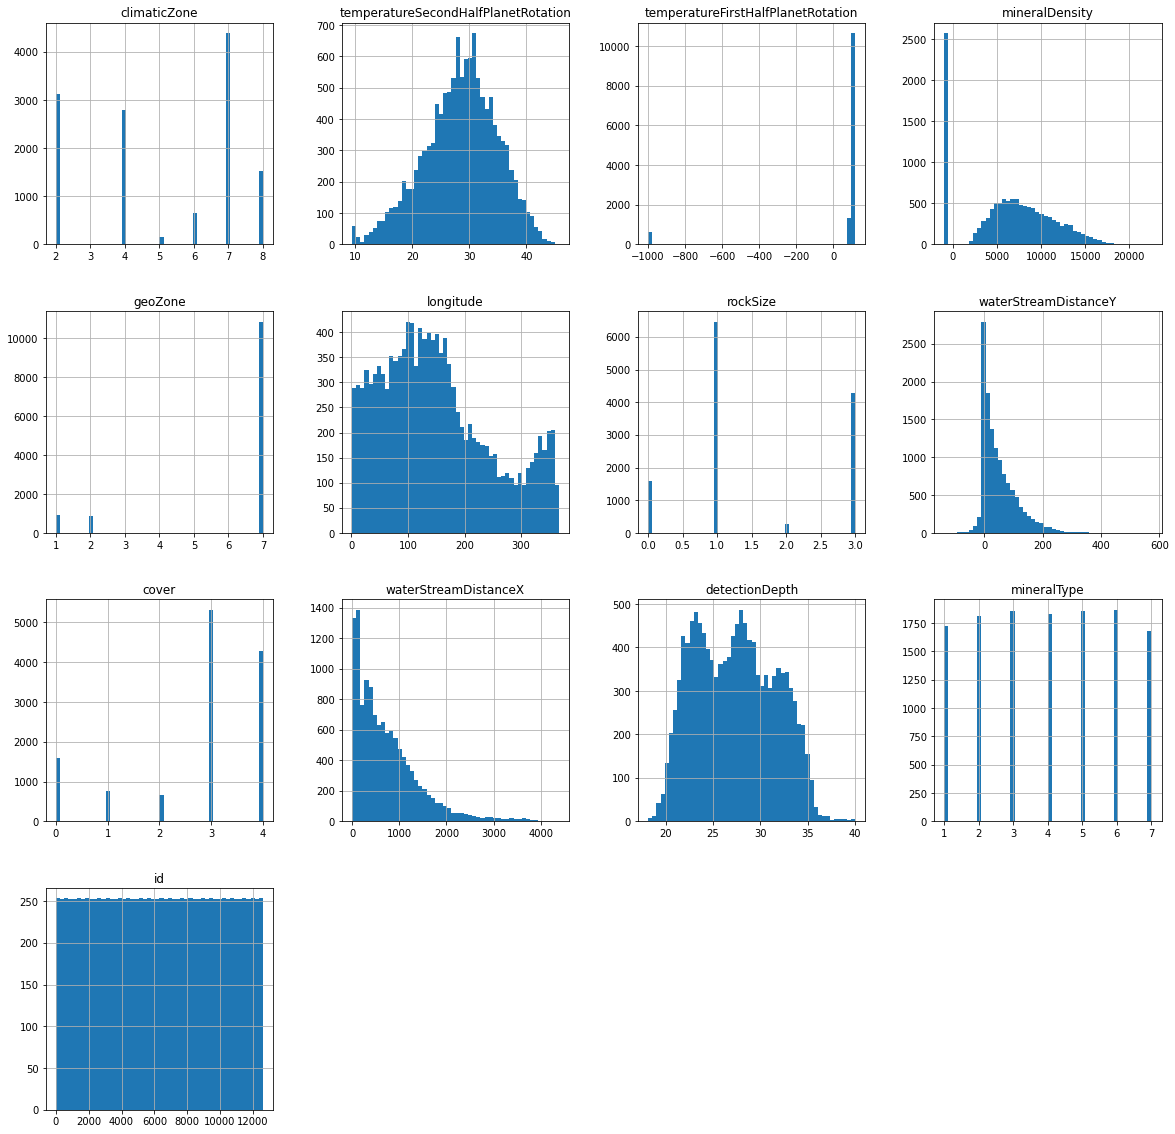

In [10]:
# Now we will do the EDA - Exploratory Data Analysis for train dataset
# Histogram for all columns in train dataset
train.hist(figsize=(20,20), bins=50, xlabelsize=10, ylabelsize=10, grid=True)

In [11]:
train.dtypes

climaticZone                             int64
planetSection                           object
temperatureSecondHalfPlanetRotation    float64
temperatureFirstHalfPlanetRotation     float64
mineralDensity                         float64
geoZone                                  int64
longitude                              float64
rockSize                                 int64
waterStreamDistanceY                   float64
cover                                    int64
magmaConcentrationDistance              object
waterStreamDistanceX                   float64
detectionDepth                         float64
mineralType                              int64
id                                       int64
dtype: object

In [12]:
# Como vemos, algunas columnas son numericas, algunas son categoricas, y algunas son object (string)
# Por lo tanto, vamos a hacer una distribucion de los datos numericos
# Primero vamos a ver la distribucion de los datos numericos
train.describe()

,climaticZone,temperatureSecondHalfPlanetRotation,temperatureFirstHalfPlanetRotation,mineralDensity,geoZone,longitude,rockSize,waterStreamDistanceY,cover,waterStreamDistanceX,detectionDepth,mineralType,id
count,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000
mean,5.145947,28.498011,49.300848,6429.971654,6.221060,150.497032,1.573409,51.023482,2.786467,735.904599,27.337719,3.997861,6310.000000
std,2.224898,6.384125,239.574487,4859.709989,1.928706,96.298261,1.085754,61.035505,1.315744,685.087360,4.195630,1.970884,3643.513208
min,2.000000,9.500000,-999.000000,-999.000000,1.000000,0.980000,0.000000,-136.830000,0.000000,0.000000,18.160000,1.000000,0.000000
25%,4.000000,24.500000,99.100000,3573.420000,7.000000,75.650000,1.000000,4.890000,3.000000,209.970000,23.710000,2.000000,3155.000000
50%,6.000000,28.900000,104.000000,6688.830000,7.000000,136.100000,1.000000,32.230000,3.000000,577.240000,27.290000,4.000000,6310.000000
75%,7.000000,32.900000,108.600000,9841.940000,7.000000,210.770000,3.000000,79.350000,4.000000,1056.170000,30.700000,6.000000,9465.000000
max,8.000000,45.700000,118.400000,22478.670000,7.000000,367.110000,3.000000,572.140000,4.000000,4386.000000,40.010000,7.000000,12620.000000


In [13]:
# Ahora vamos a ver la distribucion de los datos categoricos (object)
train.describe(include=['object'])

,planetSection,magmaConcentrationDistance
count,12621,12621
unique,3,5
top,Tatoooine,VERY_CLOSE
freq,5502,7145


In [14]:
# Como vemos, la columna "planetSection" y "magmaConcentrationDistance" tiene muchos valores unicos, por lo tanto, vamos a hacer una distribucion de los datos categoricos
train.planetSection.value_counts()

Tatoooine    5502
Hyrule       4007
Mordor       3112
Name: planetSection, dtype: int64

In [15]:
train.magmaConcentrationDistance.value_counts()

VERY_CLOSE    7145
CLOSE         4175
MEDIUM         913
FAR            251
VERY_FAR       137
Name: magmaConcentrationDistance, dtype: int64

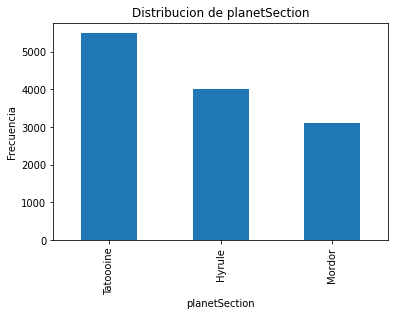

In [16]:
# Plot de value_counts para planetSection y magmaConcentrationDistance
train.planetSection.value_counts().plot(kind='bar')
plt.title('Distribucion de planetSection')
plt.xlabel('planetSection')
plt.ylabel('Frecuencia')
plt.show()

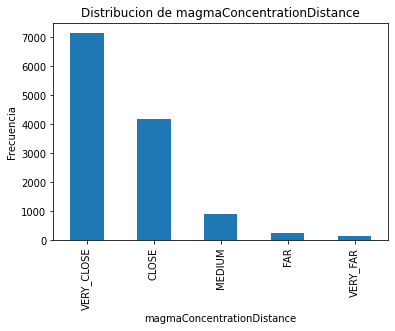

In [17]:
train.magmaConcentrationDistance.value_counts().plot(kind='bar')
plt.title('Distribucion de magmaConcentrationDistance')
plt.xlabel('magmaConcentrationDistance')
plt.ylabel('Frecuencia')
plt.show()

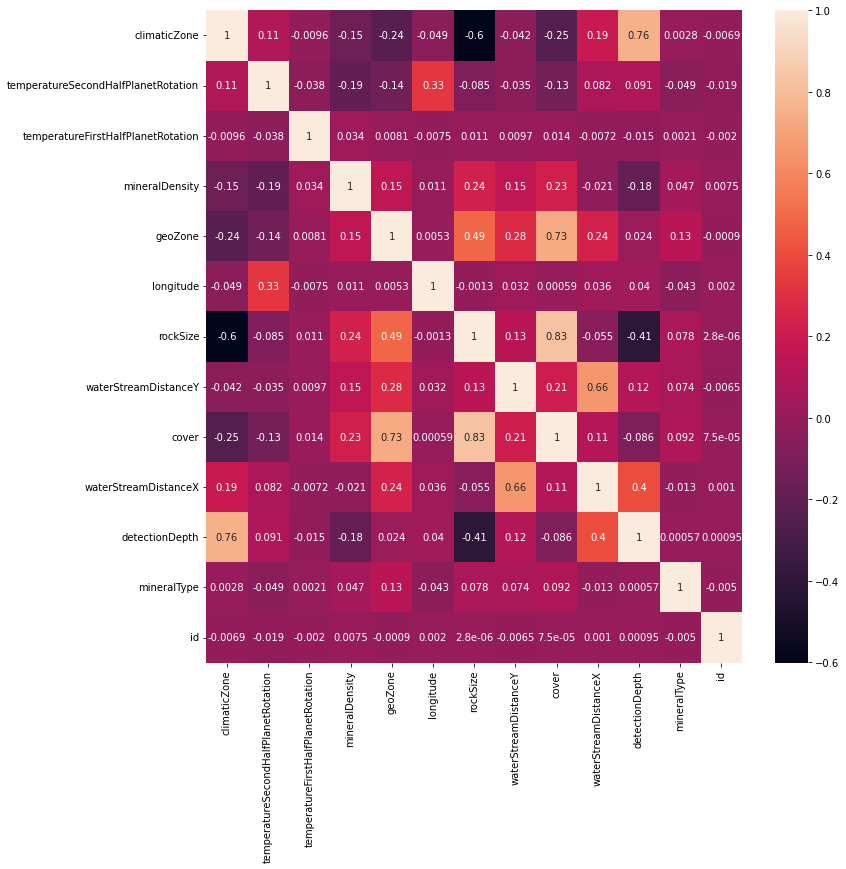

In [18]:
# Vamos a ver si hay alguna correlacion entre las columnas de train
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, ax=ax)
plt.show()

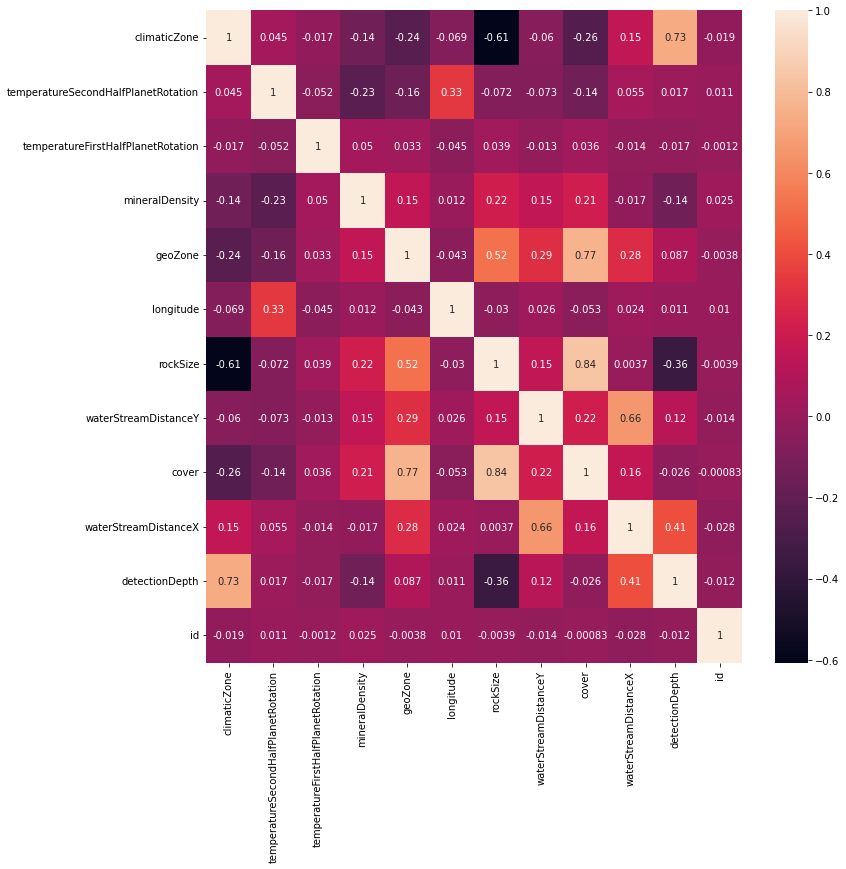

In [19]:
# Vamos a comparar los datos de train con los de test para ver si hay alguna correlacion
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(test.corr(), annot=True, ax=ax)
plt.show()

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


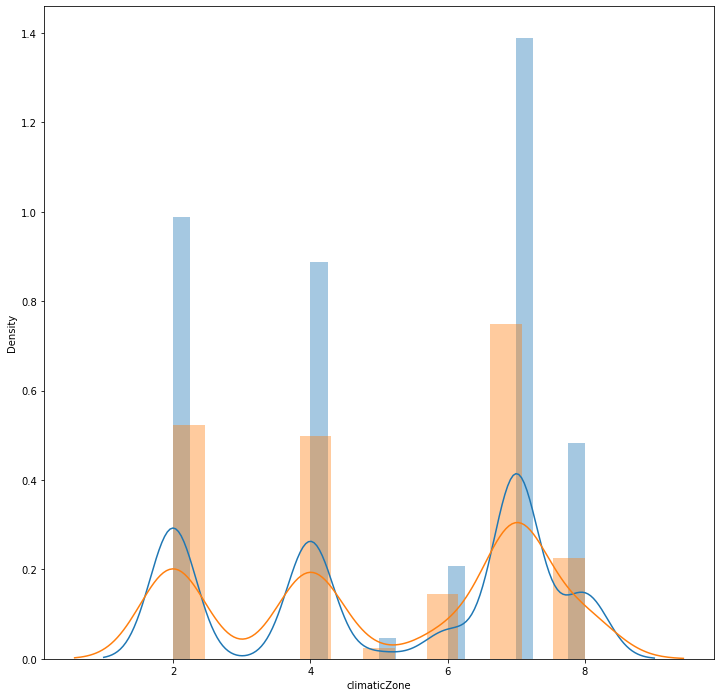

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


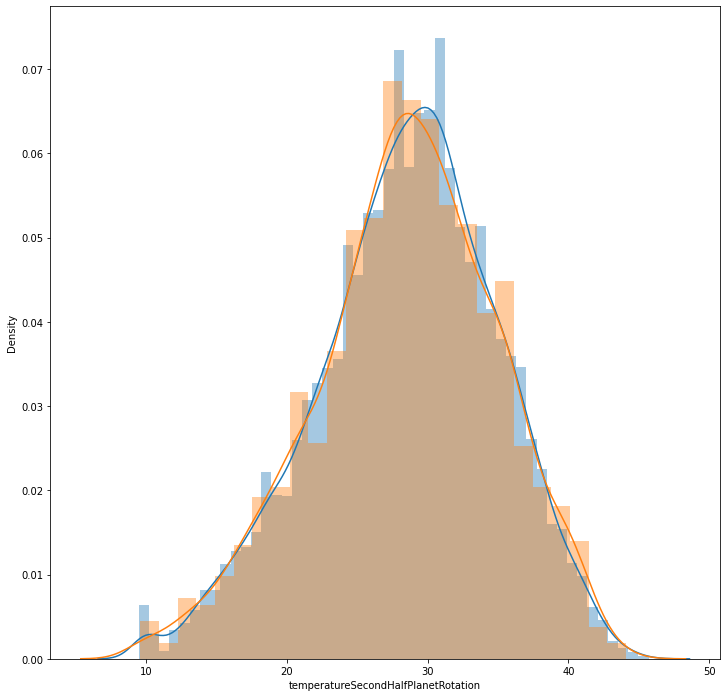

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


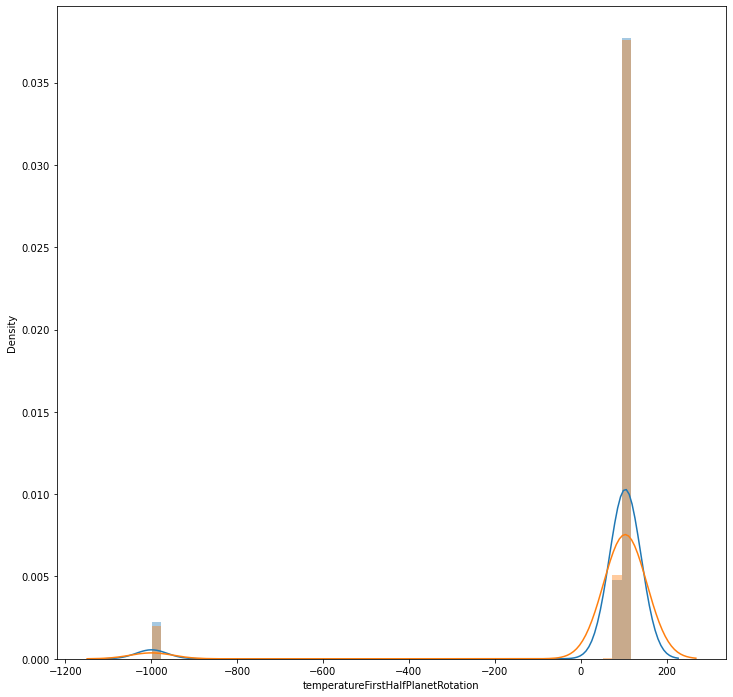

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


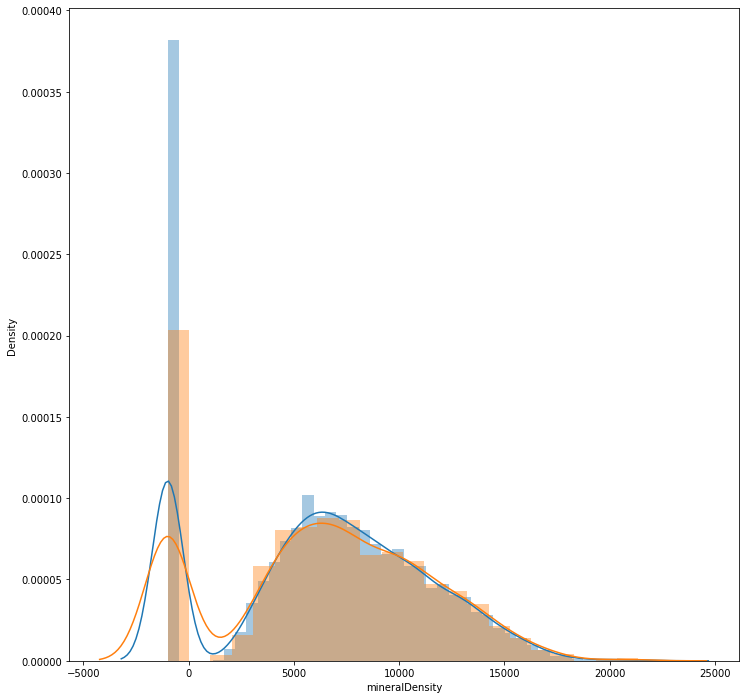

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


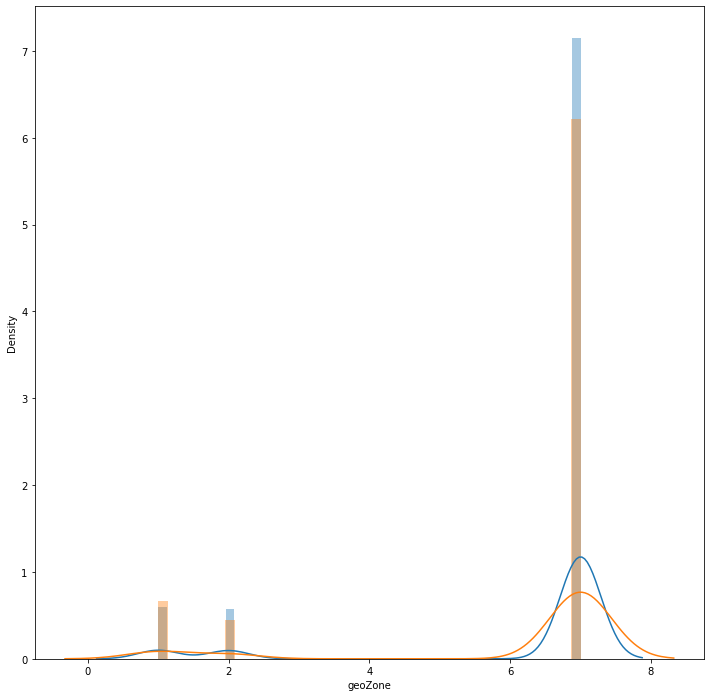

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


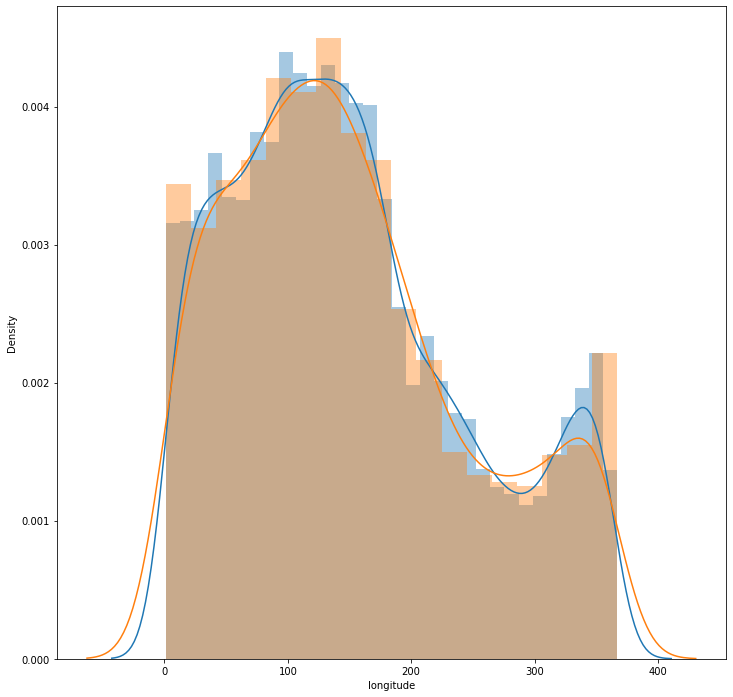

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


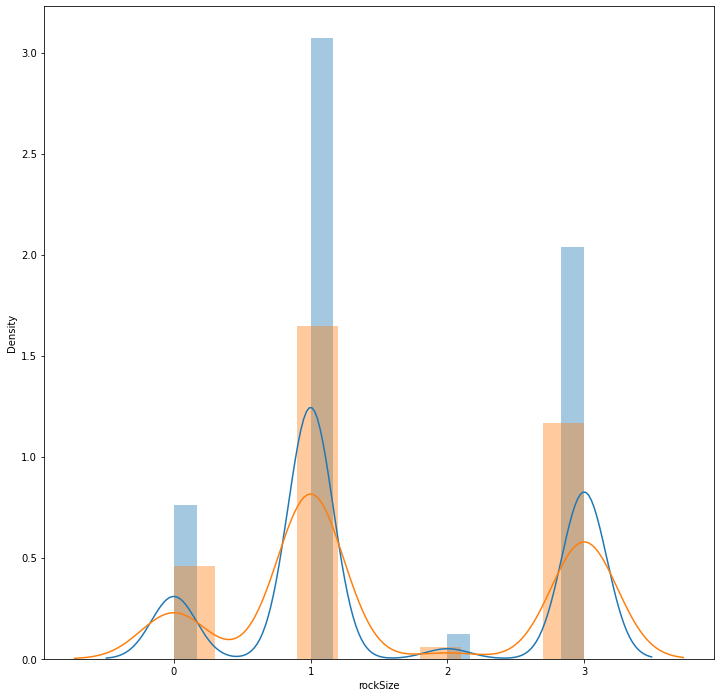

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


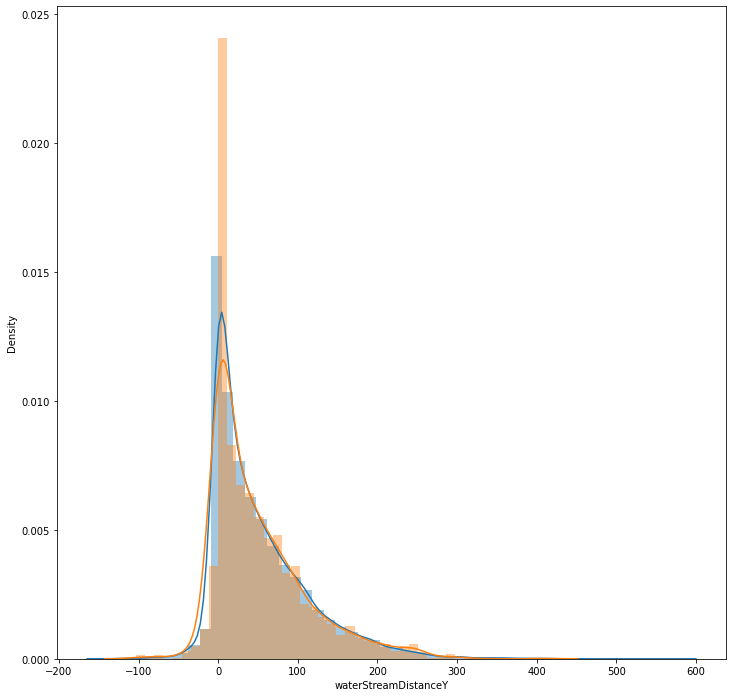

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


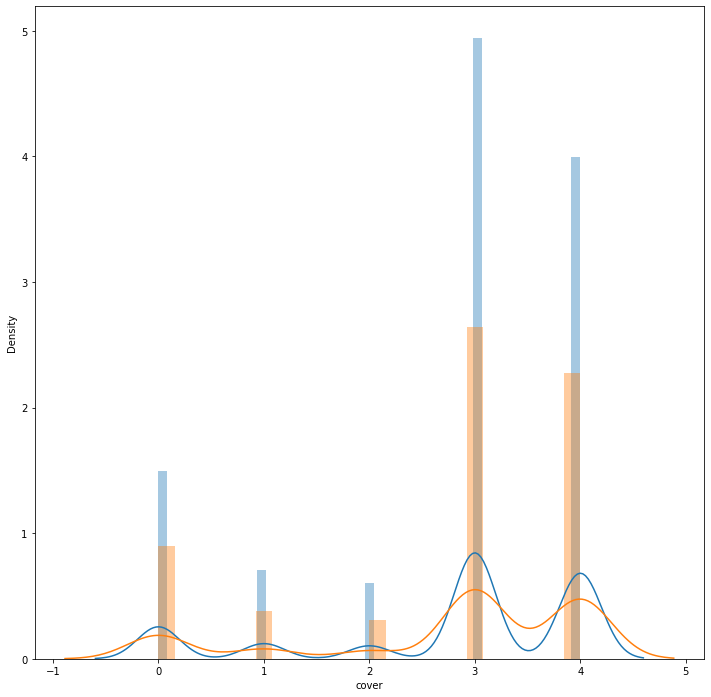

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


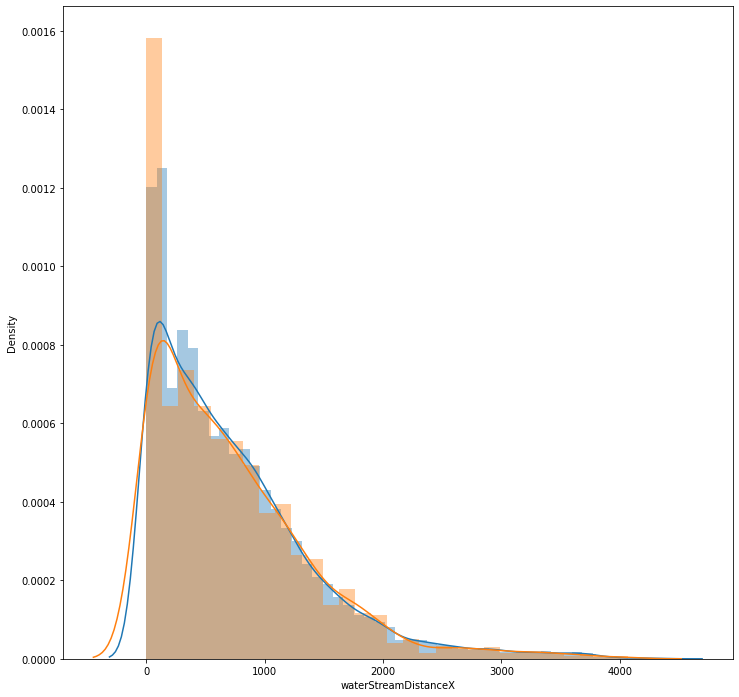

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


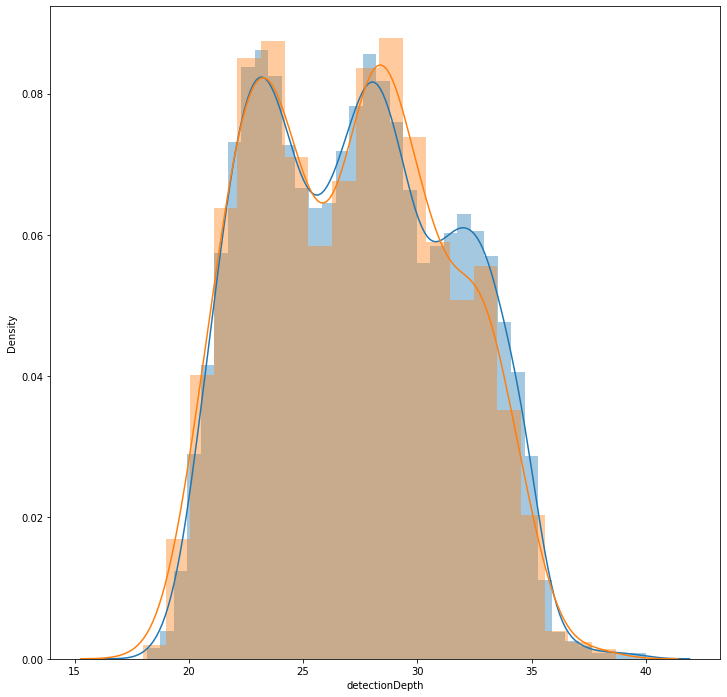

/home/sergio/.pyenv/versions/3.7.13/envs/fase6/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


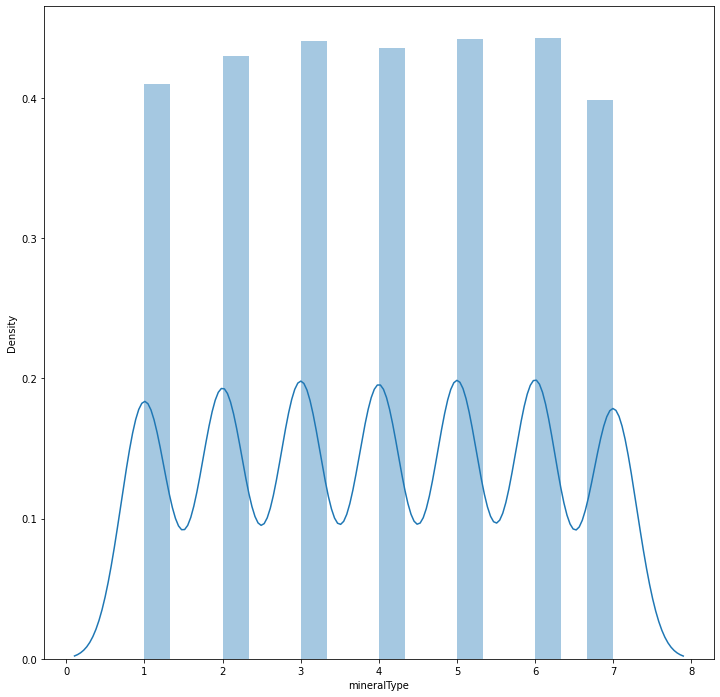

In [20]:
# Let's compare distribution of the data, train against test for each column
# First we will do it for numeric columns
try:
    for col in train.columns:
        if train[col].dtype == 'int64' or train[col].dtype == 'float64':
            fig, ax = plt.subplots(figsize=(12,12))
            sns.distplot(train[col], ax=ax)
            sns.distplot(test[col], ax=ax)
            plt.show()
except:
    pass

Como observamos, la distribución de train y test es bastante similar, por lo que no tenemos que preocuparnos por el tamaño de los datos. En este caso, el tamaño de los datos es de 2,000 registros en test y 12,621 en train.

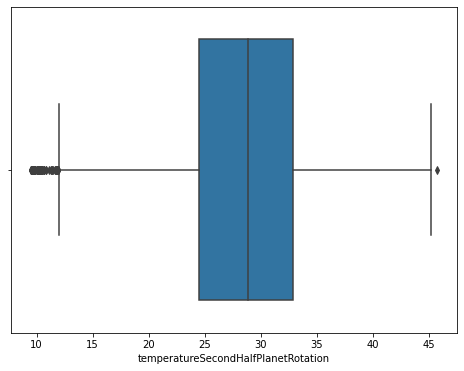

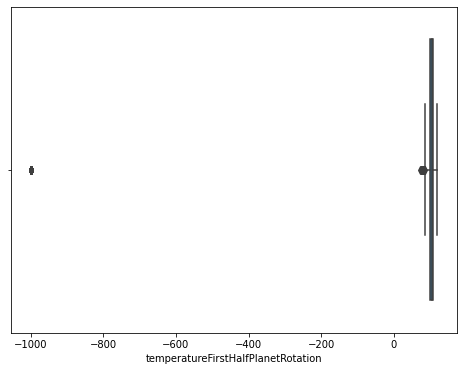

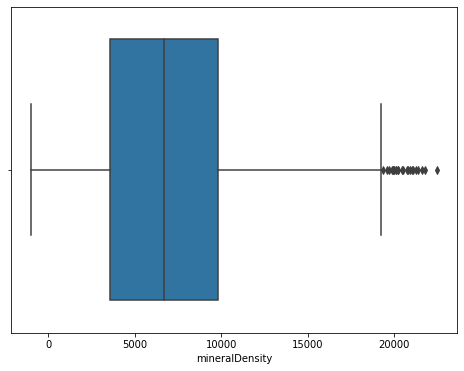

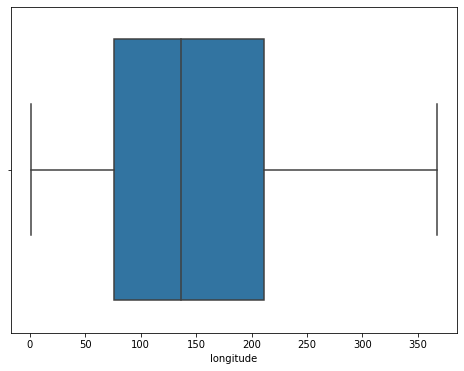

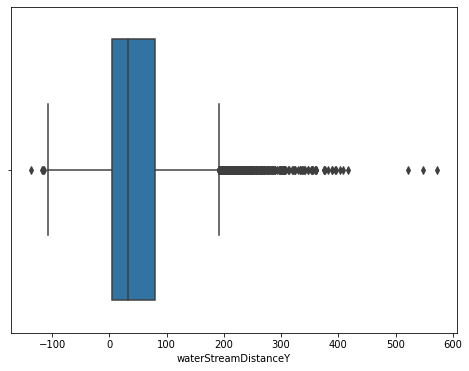

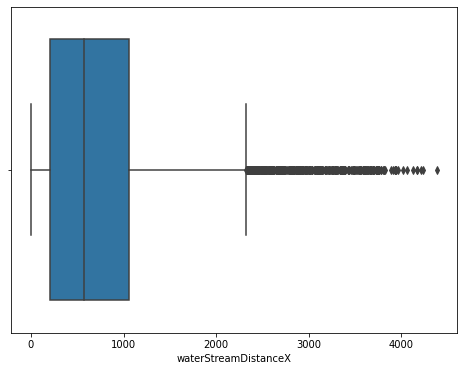

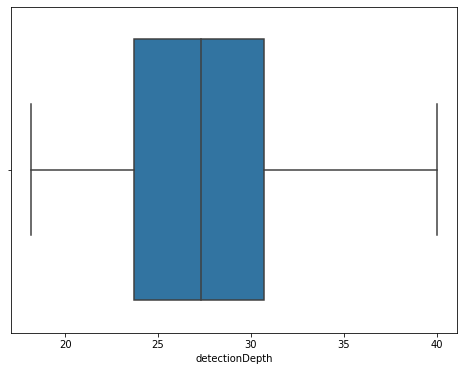

In [21]:
for col in train.columns:
  if train[col].dtype == 'float64':
    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x=train[col])
    plt.show()

Se puede apreciar como en el caso de temperatureFirstHalfPlanetRotation existen outliers muy pronunciados que deberemos tratar antes del entrenamiento del modelo (reducen la normalidad del conjunto, aumentando la varianza del error y disminuyendo la bondad de ajuste del modelo).

Estudiar las columnas del conjunto waterStream ya que también presentan, aunque en menor medida, algunos outleirs y desviación alta (especialmetne waterStreamX, sobre 700).

# Missing values

In [22]:
import missingno as msno

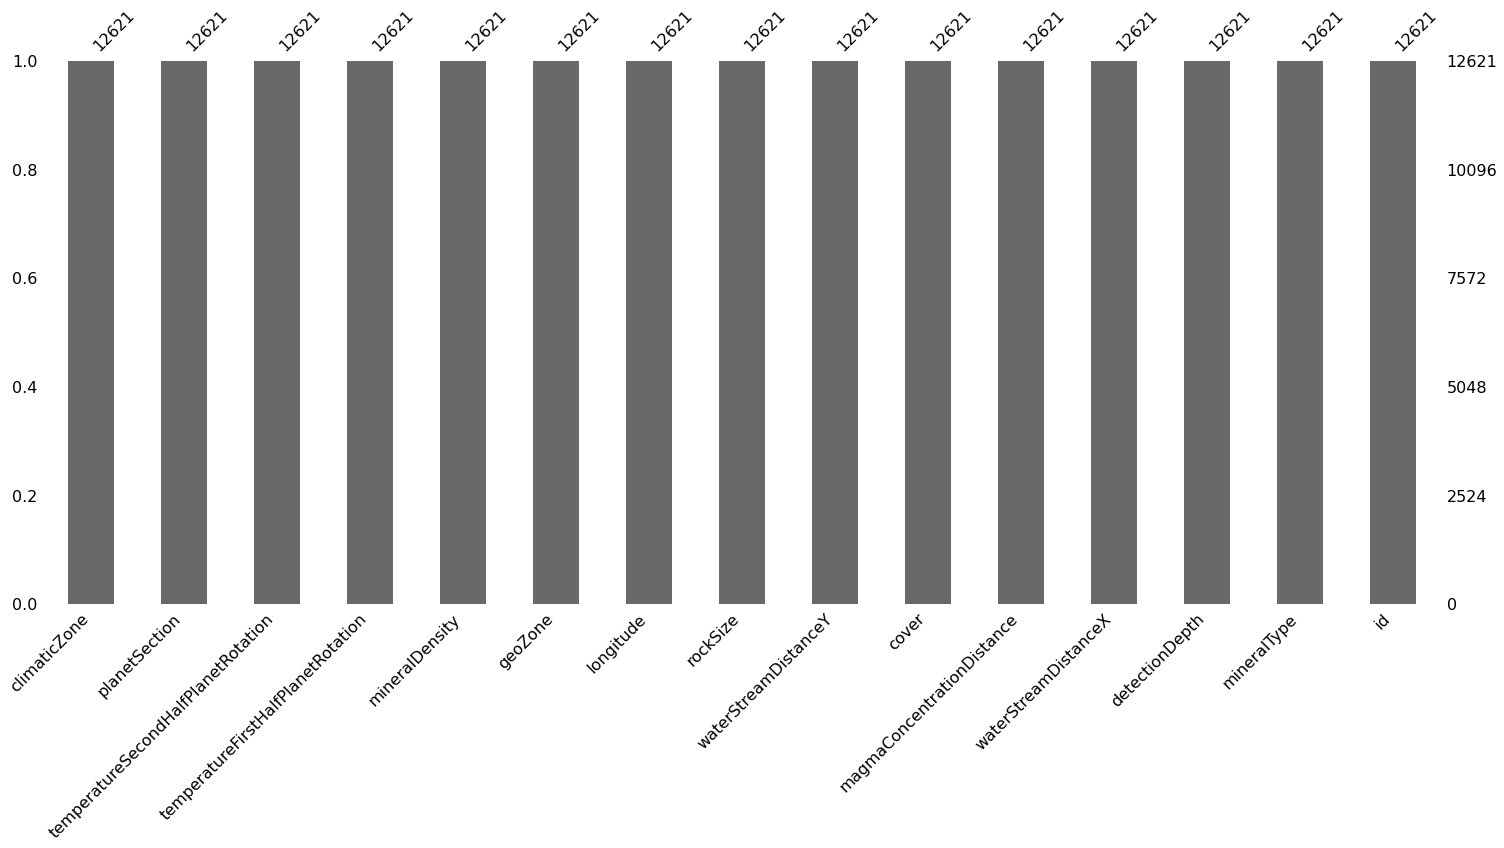

In [23]:
msno.bar(train)
plt.show()

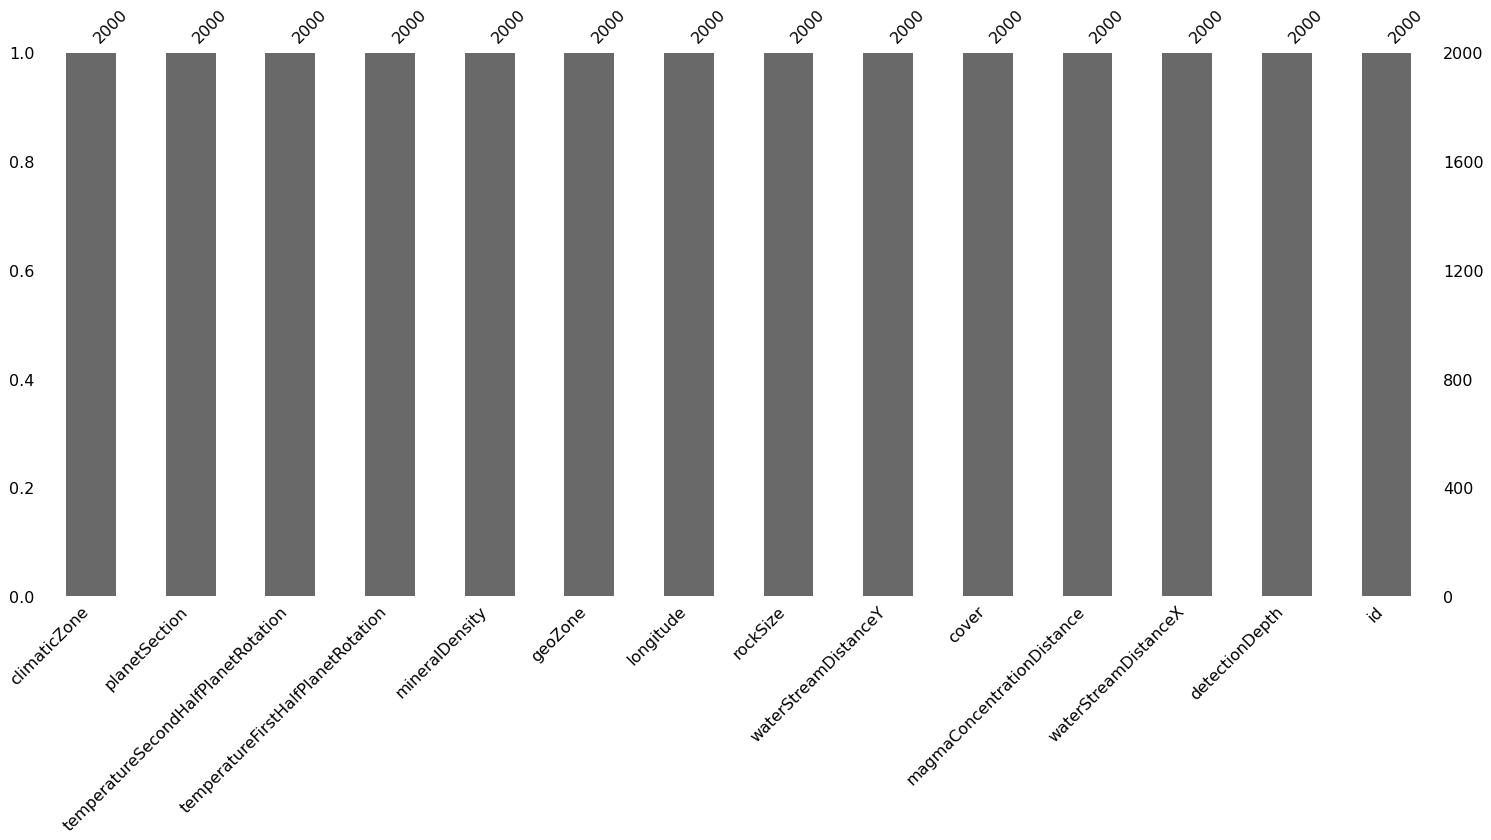

In [24]:
msno.bar(test)
plt.show()

No hay valores nulos para ninguno de los conjuntos de datos.

# Data Preprocessing (Data Cleaning)
Primero de todo vamos a leer la metadata de los datos para ver qué es lo que hay en cada columna y cómo interpretarlos correctamente.

## Metadata

```
Fantastic Minerals and Where to Find Them

### Context

This dataset contains information about the predominant kinds of minerals registered in a newly found planet. 
This information can be used to determine the likelihood of 100 x 100 meters cartographic observation 
of the planet being covered by a particular mineral.

### Metadata
- Number of variables: 13
- Target variable: mineralType
- Number of observations: 12621

Variable details
- temperatureFirstHalfPlanetRotation # Average temperature of the area during the first half of the planet's rotation in Farenheit
- temperatureSecondHalfPlanetRotation # Average temperature of the area during the second half of the planet's rotation in Celsius
- waterStreamDistanceX # X Distance to nearest water stream in feet
- waterStreamDistanceY # Y Distance to nearest water stream in meters
- planetSection # Planet section designation
- cover # Cover found on the surface. Note: If cover is not found, the value is 0.
- climaticZone # Climatic Zone of area ordered by their natural order
- geoZone # Geological Zone of area, no natural order
- rockSize #  Note: If rock size is not found, the value is 0.
- magmaConcentrationDistance # Distance to nearest concentration of magma, such as volcanos or high temperature areas
- mineralDensity # Density of the area underground in kg/m3
- detectionDepth # Depth of mineral detection in kilometers
- longitude # Orientation of the planet in degrees

Target variable detail:
- mineralType # Predominant variable found in the area

The Mineral Types found are:
- 1 Titanite 
- 2 Rupee
- 3 Milhousenite
- 4 Mythril Ore
- 5 Beeblebrox
- 6 Veritaserum
- 7 Pure Beskar

*More details*

The Planet Sections are:
- Mordor
- Tatoooine
- Hyrule
 
Cover types are:
- 1 cover has 0.01% to 0.1% of stones on surface
- 2 cover has 0.1% to <3% of stones on surface 
- 3 cover has 3% to <15% of stones on surface
- 4 cover has 15% to <50% of stones on surface
- 5 cover has >50% of stones on surface
- 0 no cover found

Rock sizes are:
- 1 Normal Stones
- 2 Large Mass
- 3 Broken Remains
- 0 No Rock size specified
```

## Conclusiones
Vamos por orden de las columnas y las modificaciones que a simple vista vemos que debemos realizar.

- temperatureFirstHalfPlanetRotation # Es una variable numérica, deberíamos cambiar las unidades de la temperatura de Farenheit a Celsius.
- temperatureSecondHalfPlanetRotation # Es una variable numérica, nada. Ya están en Celsius.
- waterStreamDistanceX # Es una variable numérica, deberíamos cambiar las unidades de la distancia de feet a metros.
- waterStreamDistanceY # Es una variable numérica, nada. Ya están en metros.
- planetSection # Es una variable categórica, habrá que hacer One-Hot Encoding.
- cover # Es una variable categórica, a priori hay que hacer One-Hot Encoding, además si el valor es 0, no hay cover. (OJO con que nos dice que hay 5 categorías pero la cat nº 5 no aparece ni en test ni train)
- climaticZone # Es una variable categórica, hay orden natural, por lo que hay que hacer Integer Encoding.
- geoZone # Es una variable categórica, no hay orden natural, por lo que hay que hacer One-Hot Encoding. Los valores son: 1, 2, 5, 7. Pero resulta que solo tenemos 1 dato de la categoría 5. ¿Deberíamos descartarla?
- rockSize # Es una variable numérica, si el valor es 0, no hay rock size.
- magmaConcentrationDistance # Es una variable categórica con 5 categorías, VERY_CLOSE, CLOSE, MEDIUM, FAR, VERY_FAR. Podríamos hacer One-Hot Encoding o Integer Encoding si queremos usar el orden natural, pero no sabemos la relación exacta entre las categorías.
- mineralDensity # Es una variable numérica, nada, ya está en kg/m3.
- detectionDepth # Es una variable numérica, deberíamos cambiar las unidades de la distancia de kilometros a metros solo si queremos "normalizar" la variable con las demás que están en metros, si se normalizan todas las variables, esto no sería necesario.
- longitude # Es una variable numérica, en principio no hay que hacer nada, pero me llama la atención que hay bastantes valores por encima de los 360 grados, ¿Estará esto en el rango de 0 a 360?
- mineralType # Es una variable categórica y el target, hay que hacer One-Hot Encoding.

Dudas/Notas:

- magmaConcentrationDistance: Si usamos one hot nos quitamos de problemas, pero podemos hacer pruebas con los 2.
- detectionDepth: Aun normalizando lo pasaria a metros por tener todo en el mismo contexto.

Integer encoding = Ordinal encoding (sklearn)

TODO:
- Mirar PCA